<a href="https://colab.research.google.com/github/lsneerg/pandas_exercises/blob/master/07_Visualization/Chipotle/Exercises_suny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

In [39]:
top5 = chipo.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values(by='quantity', ascending=False).iloc[:5]

In [40]:
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


<Axes: xlabel='item_name'>

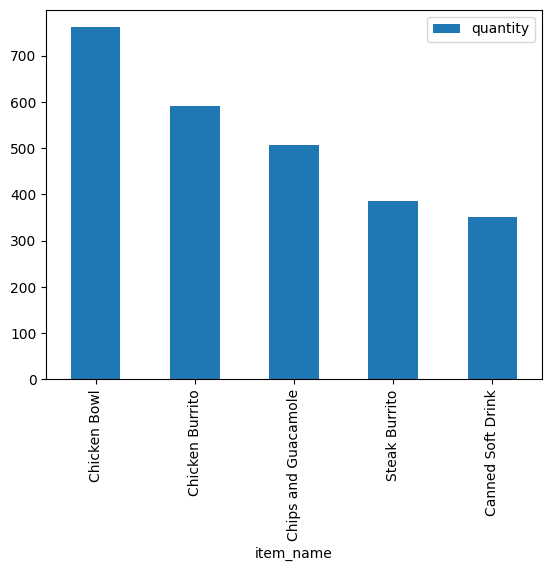

In [50]:
top5.plot(kind='bar', x='item_name', y='quantity')

In [46]:
top5.reset_index(inplace=True)

<Axes: xlabel='item_name', ylabel='quantity'>

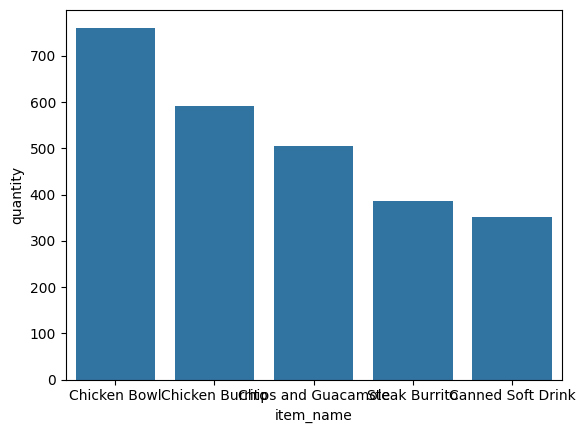

In [48]:
import seaborn as sns

sns.barplot(
    y=top5['quantity'],
    x=top5['item_name'],
)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [16]:
chipo.sample(5)

,order_id,quantity,item_name,choice_description,item_price
1439,584,1,Chips and Guacamole,NaN,$3.99
2993,1191,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Pinto Bea...",$11.75
2724,1081,1,Canned Soft Drink,[Nestea],$1.25
1019,419,1,Barbacoa Crispy Tacos,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$8.99
52,24,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",$10.98


In [20]:
chipo['px_float'] = chipo['item_price'].map(lambda x: x.replace("$", "")).astype('float64')

In [21]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,px_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [27]:
orders = chipo.groupby('order_id')[['quantity', 'px_float']].sum()

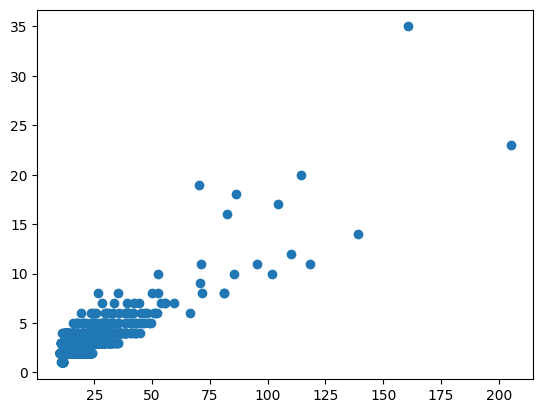

In [29]:
plt.scatter(orders.px_float, orders.quantity)

### Step 7. BONUS: Create a question and a graph to answer your own question.

(array([1.685e+03, 1.190e+02, 1.200e+01, 9.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10.08 ,  29.597,  49.114,  68.631,  88.148, 107.665, 127.182,
        146.699, 166.216, 185.733, 205.25 ]),
 <BarContainer object of 10 artists>)

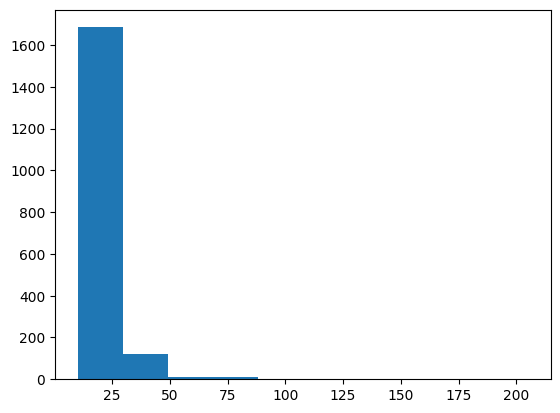

In [30]:
plt.hist(orders['px_float'])
plt.